In [23]:
import pandas as pd
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# turning the column names into lower
for col in df.columns:
    df.rename(columns={col:col.lower()},inplace=True)

In [5]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [6]:
# selecting the important columns
df.drop(['passengerid','name','ticket'],axis=1,inplace=True)

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
# Checking the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   cabin     204 non-null    object 
 8   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [9]:
# changing dtypes:
cls=df.drop(['fare','age','cabin'],axis=1).columns

In [10]:
df[cls]=df[cls].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    category
 1   pclass    891 non-null    category
 2   sex       891 non-null    category
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    category
 5   parch     891 non-null    category
 6   fare      891 non-null    float64 
 7   cabin     204 non-null    object  
 8   embarked  889 non-null    category
dtypes: category(6), float64(2), object(1)
memory usage: 27.4+ KB


In [12]:
# Checking null values
null=df.isnull().sum()
ratio=null/df.shape[0]
pd.DataFrame({'Null':null,'Ratio':ratio}).T

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
Null,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245


In [13]:
df.drop(['cabin'],axis=1,inplace=True)

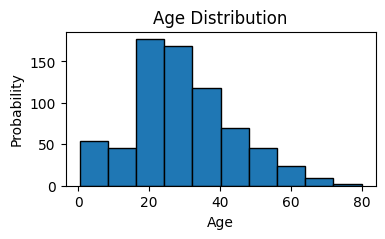

In [14]:
# df['age'].plot(kind='hist')
plt.figure(figsize=(4,2))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.hist(df['age'],edgecolor='black');

In [15]:
df['age'].fillna(df['age'].median(),inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    category
 1   pclass    891 non-null    category
 2   sex       891 non-null    category
 3   age       891 non-null    float64 
 4   sibsp     891 non-null    category
 5   parch     891 non-null    category
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    category
dtypes: category(6), float64(2)
memory usage: 20.5 KB


In [17]:
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  889 non-null    category
 1   pclass    889 non-null    category
 2   sex       889 non-null    category
 3   age       889 non-null    float64 
 4   sibsp     889 non-null    category
 5   parch     889 non-null    category
 6   fare      889 non-null    float64 
 7   embarked  889 non-null    category
dtypes: category(6), float64(2)
memory usage: 27.2 KB


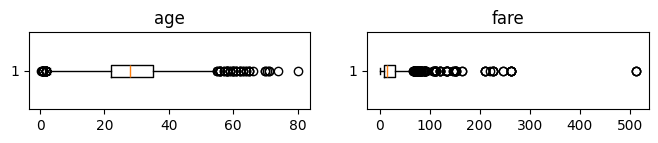

In [19]:
# selecting columns with certain datatypes
numeric_cols=df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(numeric_cols):
    plt.subplot(1,2,i+1)
    plt.boxplot(df[col],orientation='horizontal')
    plt.title(col)

In [20]:
for col in numeric_cols:
    Q1=df[col].quantile(.25)
    Q3=df[col].quantile(.75)
    IQR=Q3-Q1
    lower_fence=Q1-1.5*IQR
    upper_fence=Q3+1.5*IQR
    lower_outliers=df[df[col]<lower_fence][col].values
    upper_outliers=df[df[col]>upper_fence][col].values
    df[col].replace(lower_outliers,lower_fence,inplace=True)
    df[col].replace(upper_outliers,upper_fence,inplace=True)
    

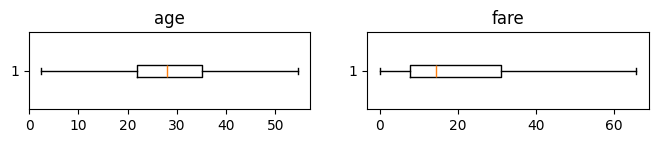

In [21]:
numeric_cols=df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(numeric_cols):
    plt.subplot(1,2,i+1)
    plt.boxplot(df[col],orientation='horizontal')
    plt.title(col)

<Axes: xlabel='count', ylabel='sex'>

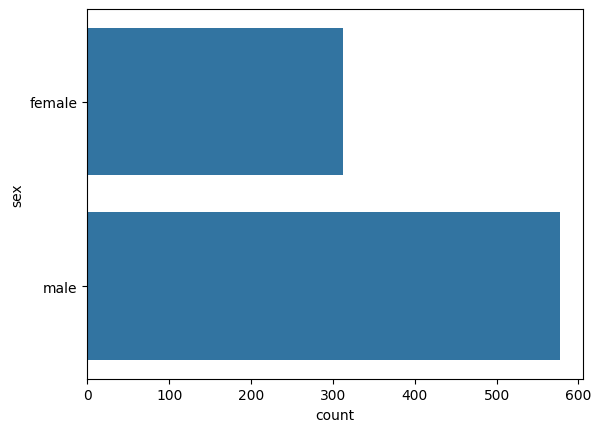

In [26]:
sns.countplot(y=df['sex'])